# TASK 1
* **(1)** Pick any image based dataset from the list, **(2)** implement the preprocessing and justify the preprocessing steps, **(3)** extract features and justify the methods used, **(4)** select features and justify the methods used. Some of this is done already in one of the previous assignments. You can reuse things. **(5)** Implement (using the selected features) one basic machine learning algorithm for classification and justify your choice 20 (without justification 10).

* Implement (using the selected features) one advanced machine learning algorithm for classification and justify your choice 20 (without justification 10). 

* Implement a CNN with hyperparameter tuning (for this you can directly use the data after the preprocessing) (30)

* Compare and Explain the results in terms of both the computation time and the performance of the classification algorithms. (30) 


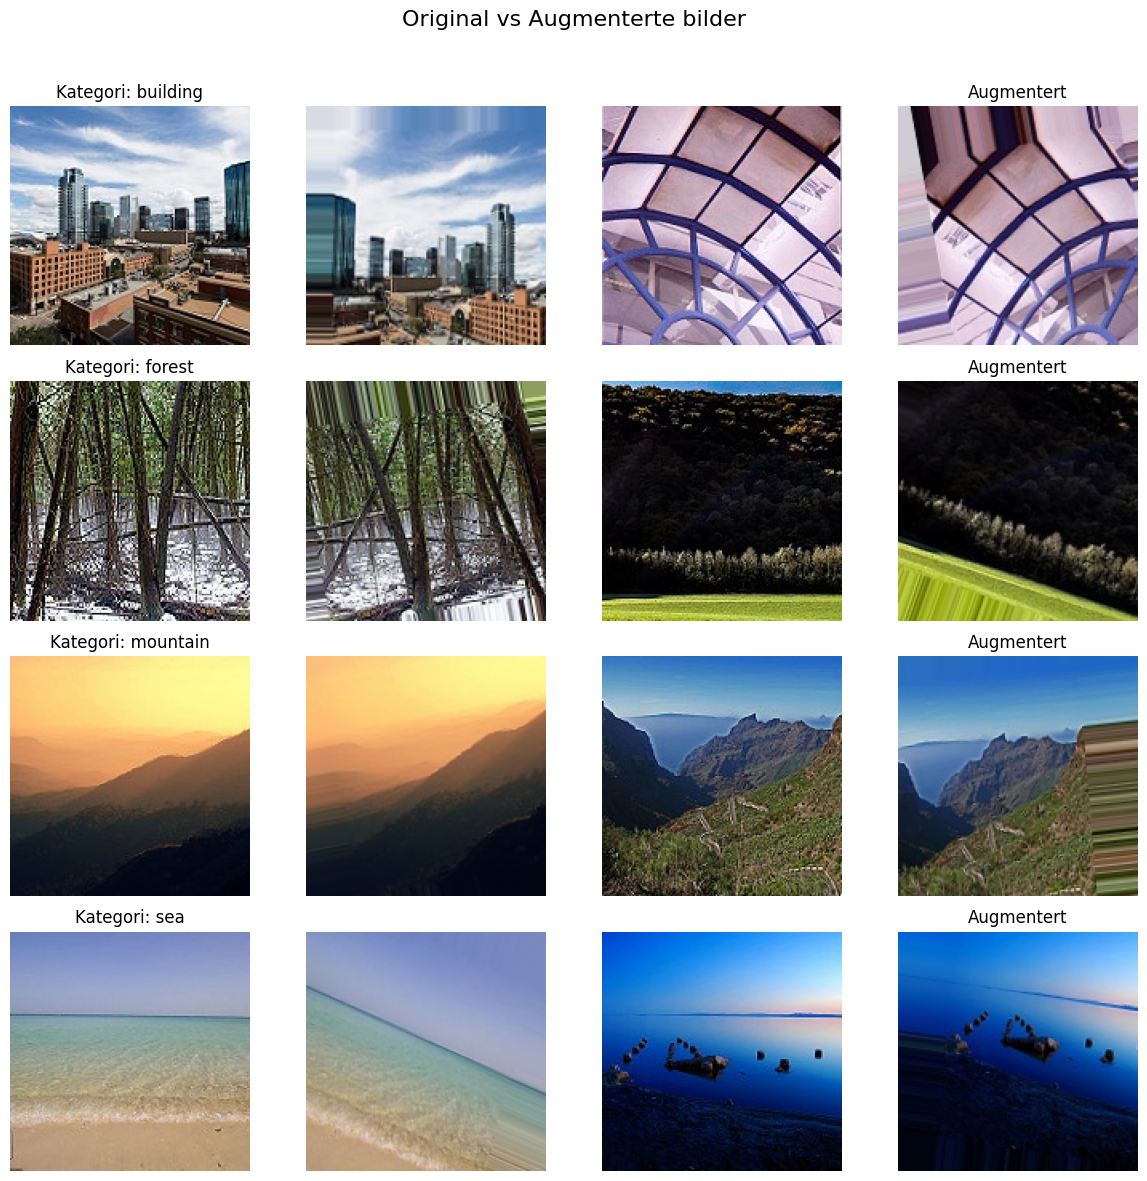

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os

# Definerer bildestørrelsen og stien til dataset
img_height, img_width = 150, 150
path_to_images = 'Intel-Image-Subset'

# Laster inn fire bilder fra hver kategori
categories = os.listdir(path_to_images)[:4]  # Velg de første fire kategoriene
sample_images = []
for category in categories:
    category_path = os.path.join(path_to_images, category)
    images_in_category = os.listdir(category_path)[:4]  # Velg de første fire bildene per kategori
    for img_name in images_in_category:
        img_path = os.path.join(category_path, img_name)
        img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_height, img_width))
        img = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normaliser bildet til [0,1]
        sample_images.append(img)

# Konverter sample_images til en numpy array for enkel augmentering
sample_images = np.array(sample_images)

# Konfigurerer data-augmentering
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Genererer augmenterte bilder
augmented_images = [datagen.random_transform(img) for img in sample_images]

# Visualisering av originalbilder og augmenterte bilder
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
fig.suptitle("Original vs Augmenterte bilder", fontsize=16)

# Plot originalbilder i venstre kolonne og augmenterte bilder i høyre kolonne
for i in range(4):
    for j in range(2):
        idx = i * 4 + j * 2  # Finn riktig indeks for bilde
        # Originale bilder (før augmentering)
        axes[i, j*2].imshow(sample_images[idx])
        axes[i, j*2].axis('off')
        if j == 0:
            axes[i, j*2].set_title(f"Kategori: {categories[i]}")
        
        # Augmenterte bilder
        axes[i, j*2 + 1].imshow(augmented_images[idx])
        axes[i, j*2 + 1].axis('off')
        if j == 1:
            axes[i, j*2 + 1].set_title("Augmentert")

plt.tight_layout()
plt.subplots_adjust(top=0.9)  # Legg til plass for tittel
plt.show()
